In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from Lawrence/Turnbaugh Diet Intervention Paper (2012)

In [20]:
human_metadata = pd.read_csv('../data/David_Turnbaugh_2012Data/basic_metadata.csv', index_col=0)
human_metadata.head()

,Subject/Food,Diet,Day
Sample ID,,,
ID63,1,Animal,-4.0
ID92,1,Animal,-3.0
ID265,1,Animal,-2.0
ID58,1,Animal,-1.0
ID46,1,Animal,0.0


## Braycurtis

In [32]:
human_bc_dm = pd.read_csv('../data/David_Turnbaugh_2012Data/distance_matrix_braycurtis.tsv', sep='\t', index_col=0)
human_bc_dm.head()

,DD1,DD10,DD100,DD101,DD102,DD103,DD104,DD106,DD107,DD108,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
DD1,0.000000,0.672067,0.827358,0.701383,0.637093,0.747862,0.682725,0.656977,0.638600,0.846004,...,0.638185,0.660316,0.808366,0.644661,0.683088,0.663175,0.719737,0.794360,0.770056,0.700210
DD10,0.672067,0.000000,0.560873,0.499754,0.423690,0.459530,0.423157,0.255965,0.481758,0.559745,...,0.355831,0.455704,0.545875,0.371346,0.496559,0.526341,0.456795,0.577203,0.537777,0.308323
DD100,0.827358,0.560873,0.000000,0.620569,0.616096,0.614544,0.610060,0.550567,0.623721,0.243582,...,0.574645,0.563064,0.254731,0.608977,0.664847,0.663082,0.547046,0.368356,0.687483,0.571041
DD101,0.701383,0.499754,0.620569,0.000000,0.310613,0.561766,0.404497,0.501855,0.527049,0.607295,...,0.509350,0.584791,0.611529,0.497413,0.556220,0.570512,0.599759,0.600860,0.633445,0.505823
DD102,0.637093,0.423690,0.616096,0.310613,0.000000,0.538686,0.366838,0.421768,0.482883,0.613952,...,0.472555,0.534196,0.611778,0.456879,0.502058,0.536862,0.543430,0.593309,0.616696,0.479195


In [33]:
named_bc_dm = pd.merge(human_metadata, human_bc_dm, left_index=True, right_index=True)
named_bc_dm.head()

,Subject/Food,Diet,Day,DD1,DD10,DD100,DD101,DD102,DD103,DD104,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
ID63,1,Animal,-4.0,0.685729,0.534271,0.671121,0.569827,0.539595,0.554837,0.534966,...,0.484836,0.604941,0.668585,0.498711,0.494687,0.162134,0.611559,0.647229,0.582347,0.522006
ID92,1,Animal,-3.0,0.663175,0.526341,0.663082,0.570512,0.536862,0.548663,0.515880,...,0.479547,0.593628,0.652135,0.481993,0.484816,0.000000,0.618242,0.637085,0.588811,0.536373
ID265,1,Animal,-2.0,0.638949,0.478594,0.629048,0.520507,0.491660,0.511367,0.482581,...,0.430031,0.534332,0.607344,0.452113,0.470653,0.228410,0.546979,0.603840,0.540654,0.459073
ID58,1,Animal,-1.0,0.677651,0.558534,0.691357,0.578433,0.563225,0.564083,0.550626,...,0.492486,0.611839,0.680205,0.514934,0.513777,0.171371,0.631808,0.664545,0.611062,0.534080
ID46,1,Animal,0.0,0.684897,0.509587,0.669861,0.505728,0.500858,0.536501,0.494135,...,0.476484,0.604571,0.656236,0.466328,0.471242,0.217806,0.602946,0.636224,0.572137,0.520826


In [34]:
sorter = ['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0']
sorterIndex = dict(zip(sorter,range(len(sorter))))
named_bc_dm['Rank'] = named_bc_dm['Day'].map(sorterIndex) #already set plant_timepoint = animal_timepoint
named_bc_dm = named_bc_dm.sort_values(by=['Rank'], axis=0, ascending=True)

In [35]:
named_bc_dm['group_time'] = named_bc_dm['Diet'].astype(str) + '_' + named_bc_dm['Day'].astype(str)

In [36]:
gt_bc_dm = named_bc_dm[['group_time']].copy()
gt_bc_dm.head()

,group_time
ID63,Animal_-4.0
ID92,Animal_-3.0
ID265,Animal_-2.0
ID58,Animal_-1.0
ID46,Animal_0.0


In [37]:
named_bc_dm = named_bc_dm.set_index('group_time')
named_bc_dm

,Subject/Food,Diet,Day,DD1,DD10,DD100,DD101,DD102,DD103,DD104,...,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99,Rank
group_time,,,,,,,,,,,,,,,,,,,,,
Animal_-4.0,1,Animal,-4.0,0.685729,0.534271,0.671121,0.569827,0.539595,0.554837,0.534966,...,0.604941,0.668585,0.498711,0.494687,0.162134,0.611559,0.647229,0.582347,0.522006,NaN
Animal_-3.0,1,Animal,-3.0,0.663175,0.526341,0.663082,0.570512,0.536862,0.548663,0.515880,...,0.593628,0.652135,0.481993,0.484816,0.000000,0.618242,0.637085,0.588811,0.536373,NaN
Animal_-2.0,1,Animal,-2.0,0.638949,0.478594,0.629048,0.520507,0.491660,0.511367,0.482581,...,0.534332,0.607344,0.452113,0.470653,0.228410,0.546979,0.603840,0.540654,0.459073,NaN
Animal_-1.0,1,Animal,-1.0,0.677651,0.558534,0.691357,0.578433,0.563225,0.564083,0.550626,...,0.611839,0.680205,0.514934,0.513777,0.171371,0.631808,0.664545,0.611062,0.534080,NaN
Animal_0.0,1,Animal,0.0,0.684897,0.509587,0.669861,0.505728,0.500858,0.536501,0.494135,...,0.604571,0.656236,0.466328,0.471242,0.217806,0.602946,0.636224,0.572137,0.520826,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Animal_6.0,11,Animal,6.0,0.666190,0.616320,0.757480,0.643922,0.604988,0.613997,0.551007,...,0.636411,0.718084,0.534553,0.320040,0.543747,0.650598,0.691044,0.541070,0.580010,NaN
Animal_7.0,11,Animal,7.0,0.646567,0.520610,0.680965,0.580792,0.522383,0.554946,0.471212,...,0.559401,0.651735,0.458849,0.248858,0.495339,0.571521,0.631652,0.526701,0.517907,NaN
Animal_8.0,11,Animal,8.0,0.660197,0.429395,0.561522,0.500714,0.451947,0.487404,0.413992,...,0.479198,0.533165,0.404452,0.275422,0.455674,0.493026,0.525974,0.499362,0.421277,NaN


In [38]:
named_bc_dm2 = named_bc_dm.drop(columns=['Subject/Food', 'Diet', 'Day', 'Rank'])
named_bc_dm2

,DD1,DD10,DD100,DD101,DD102,DD103,DD104,DD106,DD107,DD108,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
group_time,,,,,,,,,,,,,,,,,,,,,
Animal_-4.0,0.685729,0.534271,0.671121,0.569827,0.539595,0.554837,0.534966,0.542285,0.330050,0.682608,...,0.484836,0.604941,0.668585,0.498711,0.494687,0.162134,0.611559,0.647229,0.582347,0.522006
Animal_-3.0,0.663175,0.526341,0.663082,0.570512,0.536862,0.548663,0.515880,0.530286,0.301444,0.683900,...,0.479547,0.593628,0.652135,0.481993,0.484816,0.000000,0.618242,0.637085,0.588811,0.536373
Animal_-2.0,0.638949,0.478594,0.629048,0.520507,0.491660,0.511367,0.482581,0.477020,0.349849,0.646161,...,0.430031,0.534332,0.607344,0.452113,0.470653,0.228410,0.546979,0.603840,0.540654,0.459073
Animal_-1.0,0.677651,0.558534,0.691357,0.578433,0.563225,0.564083,0.550626,0.563408,0.344626,0.708213,...,0.492486,0.611839,0.680205,0.514934,0.513777,0.171371,0.631808,0.664545,0.611062,0.534080
Animal_0.0,0.684897,0.509587,0.669861,0.505728,0.500858,0.536501,0.494135,0.516978,0.326826,0.670359,...,0.476484,0.604571,0.656236,0.466328,0.471242,0.217806,0.602946,0.636224,0.572137,0.520826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Animal_6.0,0.666190,0.616320,0.757480,0.643922,0.604988,0.613997,0.551007,0.639693,0.568028,0.759344,...,0.584096,0.636411,0.718084,0.534553,0.320040,0.543747,0.650598,0.691044,0.541070,0.580010
Animal_7.0,0.646567,0.520610,0.680965,0.580792,0.522383,0.554946,0.471212,0.538049,0.497202,0.685236,...,0.508058,0.559401,0.651735,0.458849,0.248858,0.495339,0.571521,0.631652,0.526701,0.517907
Animal_8.0,0.660197,0.429395,0.561522,0.500714,0.451947,0.487404,0.413992,0.432627,0.449259,0.570139,...,0.431991,0.479198,0.533165,0.404452,0.275422,0.455674,0.493026,0.525974,0.499362,0.421277


In [39]:
rn_bc_dm = pd.merge(named_bc_dm2.T, gt_bc_dm, left_index=True, right_index=True)
rn_bc_dm2 = rn_bc_dm.set_index('group_time')
rn_bc_dm2

,Animal_-4.0,Animal_-3.0,Animal_-2.0,Animal_-1.0,Animal_0.0,Animal_1.0,Animal_2.0,Animal_4.0,Animal_5.0,Animal_6.0,...,Animal_-4.0,Animal_-3.0,Animal_0.0,Animal_1.0,Animal_5.0,Animal_6.0,Animal_7.0,Animal_8.0,Animal_9.0,Animal_10.0
group_time,,,,,,,,,,,,,,,,,,,,,
Plant_-3.0,0.534271,0.526341,0.478594,0.558534,0.509587,0.537171,0.541171,0.683427,0.673915,0.462569,...,0.489843,0.451352,0.551949,0.496559,0.537083,0.616320,0.520610,0.429395,0.469876,0.488739
Plant_5.0,0.539595,0.536862,0.491660,0.563225,0.500858,0.539323,0.578705,0.703586,0.679295,0.537341,...,0.492416,0.464501,0.523974,0.502058,0.569670,0.604988,0.522383,0.451947,0.454383,0.457092
Plant_5.0,0.534966,0.515880,0.482581,0.550626,0.494135,0.532830,0.552947,0.680642,0.650889,0.527305,...,0.439387,0.416961,0.491681,0.440984,0.534586,0.551007,0.471212,0.413992,0.408978,0.437502
Plant_4.0,0.542285,0.530286,0.477020,0.563408,0.516978,0.548954,0.565688,0.729508,0.711740,0.479896,...,0.501719,0.464267,0.567827,0.523914,0.559479,0.639693,0.538049,0.432627,0.480467,0.495692
Plant_5.0,0.330050,0.301444,0.349849,0.344626,0.326826,0.323094,0.478744,0.536545,0.529603,0.401560,...,0.496757,0.483528,0.508029,0.501595,0.511898,0.568028,0.497202,0.449259,0.492519,0.441562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Animal_-3.0,0.162134,0.000000,0.228410,0.171371,0.217806,0.212697,0.403426,0.471469,0.439970,0.409154,...,0.475693,0.472173,0.488981,0.484816,0.494492,0.543747,0.495339,0.455674,0.493554,0.469752
Animal_-4.0,0.611559,0.618242,0.546979,0.631808,0.602946,0.617933,0.596880,0.727442,0.701749,0.517576,...,0.547886,0.524783,0.588863,0.554707,0.569663,0.650598,0.571521,0.493026,0.534991,0.587097
Animal_7.0,0.647229,0.637085,0.603840,0.664545,0.636224,0.654084,0.601688,0.780022,0.753664,0.520244,...,0.627040,0.583960,0.648833,0.628200,0.595955,0.691044,0.631652,0.525974,0.598482,0.581611


In [40]:
al_bc_dm = rn_bc_dm2.filter(regex='Plant', axis=0)
alt_bc_dm = al_bc_dm.filter(regex='Animal', axis=1)
alt_bc_dm.shape

(115, 121)

In [41]:
alt_bc_dm.head()

,Animal_-4.0,Animal_-3.0,Animal_-2.0,Animal_-1.0,Animal_0.0,Animal_1.0,Animal_2.0,Animal_4.0,Animal_5.0,Animal_6.0,...,Animal_-4.0,Animal_-3.0,Animal_0.0,Animal_1.0,Animal_5.0,Animal_6.0,Animal_7.0,Animal_8.0,Animal_9.0,Animal_10.0
group_time,,,,,,,,,,,,,,,,,,,,,
Plant_-3.0,0.534271,0.526341,0.478594,0.558534,0.509587,0.537171,0.541171,0.683427,0.673915,0.462569,...,0.489843,0.451352,0.551949,0.496559,0.537083,0.616320,0.520610,0.429395,0.469876,0.488739
Plant_5.0,0.539595,0.536862,0.491660,0.563225,0.500858,0.539323,0.578705,0.703586,0.679295,0.537341,...,0.492416,0.464501,0.523974,0.502058,0.569670,0.604988,0.522383,0.451947,0.454383,0.457092
Plant_5.0,0.534966,0.515880,0.482581,0.550626,0.494135,0.532830,0.552947,0.680642,0.650889,0.527305,...,0.439387,0.416961,0.491681,0.440984,0.534586,0.551007,0.471212,0.413992,0.408978,0.437502
Plant_4.0,0.542285,0.530286,0.477020,0.563408,0.516978,0.548954,0.565688,0.729508,0.711740,0.479896,...,0.501719,0.464267,0.567827,0.523914,0.559479,0.639693,0.538049,0.432627,0.480467,0.495692
Plant_5.0,0.330050,0.301444,0.349849,0.344626,0.326826,0.323094,0.478744,0.536545,0.529603,0.401560,...,0.496757,0.483528,0.508029,0.501595,0.511898,0.568028,0.497202,0.449259,0.492519,0.441562


In [42]:
alt_bc_dm.columns.unique()

Index(['Animal_-4.0', 'Animal_-3.0', 'Animal_-2.0', 'Animal_-1.0',
       'Animal_0.0', 'Animal_1.0', 'Animal_2.0', 'Animal_4.0', 'Animal_5.0',
       'Animal_6.0', 'Animal_7.0', 'Animal_8.0', 'Animal_9.0', 'Animal_10.0',
       'Animal_3.0'],
      dtype='object')

In [43]:
alt_bc_dm2 = alt_bc_dm.drop(index=['Plant_-5.0'], axis=0)

In [44]:
mean_alt_bc_dm = alt_bc_dm2.groupby(level=0).mean()
mean_alt_bc_dm = mean_alt_bc_dm.reindex(index = ['Plant_-4.0', 'Plant_-3.0', 'Plant_-2.0', 'Plant_-1.0', 'Plant_0.0',
       'Plant_1.0', 'Plant_2.0', 'Plant_3.0', 'Plant_4.0', 'Plant_5.0',
       'Plant_6.0', 'Plant_7.0', 'Plant_8.0', 'Plant_9.0', 'Plant_10.0'])
mean2_alt_bc_dm = mean_alt_bc_dm.T.groupby(level=0).mean().sort_index(axis=0)
mean2_alt_bc_dm = mean2_alt_bc_dm.reindex(index = ['Animal_-4.0', 'Animal_-3.0', 'Animal_-2.0', 'Animal_-1.0',
       'Animal_0.0', 'Animal_1.0', 'Animal_2.0', 'Animal_3.0', 'Animal_4.0', 'Animal_5.0',
       'Animal_6.0', 'Animal_7.0', 'Animal_8.0', 'Animal_9.0', 'Animal_10.0'])
mean2_alt_bc_dm

group_time,Plant_-4.0,Plant_-3.0,Plant_-2.0,Plant_-1.0,Plant_0.0,Plant_1.0,Plant_2.0,Plant_3.0,Plant_4.0,Plant_5.0,Plant_6.0,Plant_7.0,Plant_8.0,Plant_9.0,Plant_10.0
Animal_-4.0,0.499452,0.518515,0.559040,0.535022,0.544986,0.526946,0.507993,0.531390,0.526455,0.514910,0.542423,0.534732,0.523088,0.504486,0.529752
Animal_-3.0,0.495447,0.518611,0.560126,0.536134,0.546784,0.521765,0.511170,0.534085,0.527013,0.518399,0.541416,0.522110,0.516045,0.508078,0.529135
Animal_-2.0,0.520869,0.541304,0.572977,0.549107,0.552668,0.536085,0.525268,0.551469,0.546088,0.533235,0.548778,0.548112,0.538762,0.516533,0.542696
Animal_-1.0,0.490625,0.516220,0.549523,0.525536,0.535990,0.513740,0.493773,0.523162,0.520229,0.502386,0.533008,0.525166,0.516051,0.489685,0.516423
Animal_0.0,0.488268,0.513144,0.546311,0.520371,0.530615,0.513390,0.498125,0.524065,0.519112,0.505978,0.527940,0.523468,0.511745,0.488787,0.515794
Animal_1.0,0.505808,0.529638,0.558661,0.535122,0.544665,0.533242,0.519594,0.542987,0.537245,0.528277,0.548197,0.539382,0.525704,0.507564,0.530313
Animal_2.0,0.553124,0.574597,0.593238,0.572322,0.584515,0.578764,0.572144,0.592639,0.588479,0.583714,0.594851,0.580884,0.566843,0.553480,0.572203
Animal_3.0,0.565749,0.588811,0.605905,0.587182,0.596460,0.602043,0.589417,0.603330,0.602808,0.599776,0.614725,0.603873,0.576638,0.564285,0.585979
Animal_4.0,0.603606,0.624999,0.637779,0.625736,0.629990,0.632577,0.630349,0.643587,0.642900,0.640199,0.645951,0.630592,0.614853,0.616295,0.624127
Animal_5.0,0.558112,0.585759,0.606200,0.584989,0.602790,0.596876,0.593542,0.605820,0.604176,0.603429,0.615896,0.595101,0.577265,0.568952,0.589209


In [72]:
mean2_alt_bc_dm.T.min()

Animal_-4.0    0.499452
Animal_-3.0    0.495447
Animal_-2.0    0.516533
Animal_-1.0    0.489685
Animal_0.0     0.488268
Animal_1.0     0.505808
Animal_2.0     0.553124
Animal_3.0     0.564285
Animal_4.0     0.603606
Animal_5.0     0.558112
Animal_6.0     0.513955
Animal_7.0     0.488296
Animal_8.0     0.489783
Animal_9.0     0.503459
Animal_10.0    0.511501
dtype: float64

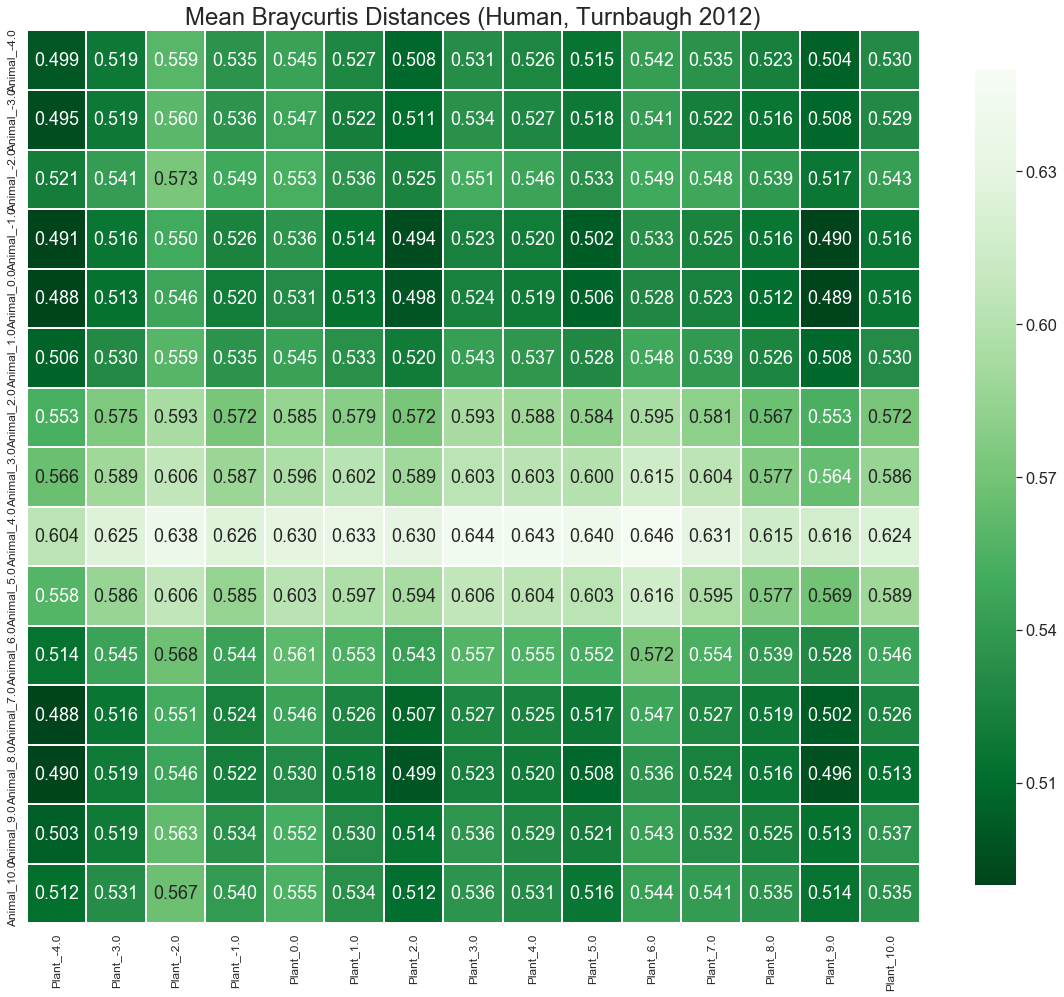

In [66]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(mean2_alt_bc_dm, cmap='Greens_r', linewidths=1, cbar_kws={"shrink": 0.75},
            annot=True, fmt = '.3f', vmin=0.49, vmax=0.65, square=True)
sns.set(font_scale=1.5)
plt.xlabel("")
plt.xticks(ha="center")
plt.ylabel("")
plt.yticks(va="center", rotation=90)
ax.set_title("Mean Braycurtis Distances (Human, Turnbaugh 2012)", size=24)
ax.tick_params(labelsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/Human_bc_mean_heatmap.svg', dpi=300, bbox_inches="tight")
#intervention Day 0-4

## Jaccard

In [46]:
human_j_dm = pd.read_csv('../data/David_Turnbaugh_2012Data/distance_matrix_jaccard.tsv', sep='\t', index_col=0)
human_j_dm.head()

,DD1,DD10,DD100,DD101,DD102,DD103,DD104,DD106,DD107,DD108,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
DD1,0.000000,0.849573,0.886406,0.809896,0.780679,0.859504,0.836978,0.831721,0.798054,0.893855,...,0.828780,0.857345,0.898533,0.841150,0.848837,0.844376,0.870345,0.891369,0.891443,0.862719
DD10,0.849573,0.000000,0.676862,0.663537,0.624204,0.609974,0.605114,0.490196,0.662162,0.690885,...,0.577291,0.607390,0.642259,0.578240,0.644279,0.687643,0.624434,0.646919,0.674004,0.528436
DD100,0.886406,0.676862,0.000000,0.712397,0.727419,0.710828,0.715297,0.690240,0.730949,0.442177,...,0.704698,0.664699,0.508537,0.707838,0.754601,0.780432,0.668611,0.511855,0.774459,0.691704
DD101,0.809896,0.663537,0.712397,0.000000,0.493023,0.709630,0.612319,0.653516,0.650000,0.706177,...,0.642504,0.710938,0.713436,0.677374,0.683735,0.714088,0.722861,0.688385,0.762972,0.669261
DD102,0.780679,0.624204,0.727419,0.493023,0.000000,0.694815,0.568266,0.626943,0.646245,0.721498,...,0.643902,0.687664,0.734647,0.665272,0.650382,0.698479,0.690013,0.705394,0.752650,0.663226


In [47]:
named_jc_dm = pd.merge(human_metadata, human_j_dm, left_index=True, right_index=True)
named_jc_dm.head()

,Subject/Food,Diet,Day,DD1,DD10,DD100,DD101,DD102,DD103,DD104,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
ID63,1,Animal,-4.0,0.851455,0.686140,0.774857,0.717631,0.696676,0.680272,0.672932,...,0.608966,0.684103,0.733886,0.616071,0.625442,0.383091,0.680612,0.712777,0.659341,0.621735
ID92,1,Animal,-3.0,0.844376,0.687643,0.780432,0.714088,0.698479,0.671233,0.666247,...,0.624384,0.674587,0.710131,0.606742,0.593976,0.000000,0.683299,0.708686,0.647177,0.613039
ID265,1,Animal,-2.0,0.857143,0.648297,0.727273,0.706621,0.681661,0.638086,0.664195,...,0.589305,0.617318,0.654437,0.565174,0.598772,0.471597,0.617021,0.654356,0.592525,0.550048
ID58,1,Animal,-1.0,0.835294,0.689904,0.790226,0.709010,0.700000,0.680572,0.674603,...,0.608924,0.685959,0.741165,0.629200,0.627936,0.422973,0.698947,0.724479,0.680698,0.631236
ID46,1,Animal,0.0,0.842857,0.662708,0.770760,0.694405,0.668596,0.672474,0.653696,...,0.605598,0.670179,0.726246,0.603666,0.600733,0.417105,0.668063,0.694989,0.661601,0.611765


In [48]:
sorter = ['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0']
sorterIndex = dict(zip(sorter,range(len(sorter))))
named_jc_dm['Rank'] = named_jc_dm['Day'].map(sorterIndex) #already set plant_timepoint = animal_timepoint
named_jc_dm = named_jc_dm.sort_values(by=['Rank'], axis=0, ascending=True)

In [49]:
named_jc_dm['group_time'] = named_jc_dm['Diet'].astype(str) + '_' + named_jc_dm['Day'].astype(str)

In [50]:
gt_jc_dm = named_jc_dm[['group_time']].copy()
gt_jc_dm.head()

,group_time
ID63,Animal_-4.0
ID92,Animal_-3.0
ID265,Animal_-2.0
ID58,Animal_-1.0
ID46,Animal_0.0


In [51]:
named_jc_dm = named_jc_dm.set_index('group_time')
named_jc_dm

,Subject/Food,Diet,Day,DD1,DD10,DD100,DD101,DD102,DD103,DD104,...,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99,Rank
group_time,,,,,,,,,,,,,,,,,,,,,
Animal_-4.0,1,Animal,-4.0,0.851455,0.686140,0.774857,0.717631,0.696676,0.680272,0.672932,...,0.684103,0.733886,0.616071,0.625442,0.383091,0.680612,0.712777,0.659341,0.621735,NaN
Animal_-3.0,1,Animal,-3.0,0.844376,0.687643,0.780432,0.714088,0.698479,0.671233,0.666247,...,0.674587,0.710131,0.606742,0.593976,0.000000,0.683299,0.708686,0.647177,0.613039,NaN
Animal_-2.0,1,Animal,-2.0,0.857143,0.648297,0.727273,0.706621,0.681661,0.638086,0.664195,...,0.617318,0.654437,0.565174,0.598772,0.471597,0.617021,0.654356,0.592525,0.550048,NaN
Animal_-1.0,1,Animal,-1.0,0.835294,0.689904,0.790226,0.709010,0.700000,0.680572,0.674603,...,0.685959,0.741165,0.629200,0.627936,0.422973,0.698947,0.724479,0.680698,0.631236,NaN
Animal_0.0,1,Animal,0.0,0.842857,0.662708,0.770760,0.694405,0.668596,0.672474,0.653696,...,0.670179,0.726246,0.603666,0.600733,0.417105,0.668063,0.694989,0.661601,0.611765,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Animal_6.0,11,Animal,6.0,0.856140,0.690387,0.787049,0.726300,0.697063,0.701583,0.661560,...,0.697802,0.738142,0.633971,0.464080,0.628502,0.703905,0.724687,0.622370,0.635754,NaN
Animal_7.0,11,Animal,7.0,0.841216,0.641154,0.743142,0.686364,0.644513,0.646986,0.625691,...,0.644049,0.694223,0.588235,0.408369,0.602410,0.641989,0.691959,0.609358,0.599330,NaN
Animal_8.0,11,Animal,8.0,0.863913,0.615385,0.661342,0.685512,0.670602,0.606405,0.623894,...,0.560784,0.585675,0.556231,0.509372,0.563710,0.570600,0.594595,0.574230,0.518227,NaN


In [52]:
named_jc_dm2 = named_jc_dm.drop(columns=['Subject/Food', 'Diet', 'Day', 'Rank'])
named_jc_dm2

,DD1,DD10,DD100,DD101,DD102,DD103,DD104,DD106,DD107,DD108,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
group_time,,,,,,,,,,,,,,,,,,,,,
Animal_-4.0,0.851455,0.686140,0.774857,0.717631,0.696676,0.680272,0.672932,0.690158,0.615165,0.783599,...,0.608966,0.684103,0.733886,0.616071,0.625442,0.383091,0.680612,0.712777,0.659341,0.621735
Animal_-3.0,0.844376,0.687643,0.780432,0.714088,0.698479,0.671233,0.666247,0.683761,0.593023,0.773823,...,0.624384,0.674587,0.710131,0.606742,0.593976,0.000000,0.683299,0.708686,0.647177,0.613039
Animal_-2.0,0.857143,0.648297,0.727273,0.706621,0.681661,0.638086,0.664195,0.655462,0.652074,0.738828,...,0.589305,0.617318,0.654437,0.565174,0.598772,0.471597,0.617021,0.654356,0.592525,0.550048
Animal_-1.0,0.835294,0.689904,0.790226,0.709010,0.700000,0.680572,0.674603,0.696041,0.600614,0.802133,...,0.608924,0.685959,0.741165,0.629200,0.627936,0.422973,0.698947,0.724479,0.680698,0.631236
Animal_0.0,0.842857,0.662708,0.770760,0.694405,0.668596,0.672474,0.653696,0.683686,0.601182,0.769683,...,0.605598,0.670179,0.726246,0.603666,0.600733,0.417105,0.668063,0.694989,0.661601,0.611765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Animal_6.0,0.856140,0.690387,0.787049,0.726300,0.697063,0.701583,0.661560,0.720627,0.701493,0.781407,...,0.674902,0.697802,0.738142,0.633971,0.464080,0.628502,0.703905,0.724687,0.622370,0.635754
Animal_7.0,0.841216,0.641154,0.743142,0.686364,0.644513,0.646986,0.625691,0.649800,0.648729,0.748130,...,0.627119,0.644049,0.694223,0.588235,0.408369,0.602410,0.641989,0.691959,0.609358,0.599330
Animal_8.0,0.863913,0.615385,0.661342,0.685512,0.670602,0.606405,0.623894,0.607497,0.676234,0.654135,...,0.589382,0.560784,0.585675,0.556231,0.509372,0.563710,0.570600,0.594595,0.574230,0.518227


In [53]:
rn_jc_dm = pd.merge(named_jc_dm2.T, gt_jc_dm, left_index=True, right_index=True)
rn_jc_dm2 = rn_jc_dm.set_index('group_time')
rn_jc_dm2

,Animal_-4.0,Animal_-3.0,Animal_-2.0,Animal_-1.0,Animal_0.0,Animal_1.0,Animal_2.0,Animal_4.0,Animal_5.0,Animal_6.0,...,Animal_-4.0,Animal_-3.0,Animal_0.0,Animal_1.0,Animal_5.0,Animal_6.0,Animal_7.0,Animal_8.0,Animal_9.0,Animal_10.0
group_time,,,,,,,,,,,,,,,,,,,,,
Plant_-3.0,0.686140,0.687643,0.648297,0.689904,0.662708,0.683739,0.658421,0.753906,0.743772,0.622247,...,0.652968,0.598060,0.655303,0.644279,0.633369,0.690387,0.641154,0.615385,0.628540,0.632704
Plant_5.0,0.696676,0.698479,0.681661,0.700000,0.668596,0.684800,0.725926,0.754561,0.751098,0.709877,...,0.665753,0.667883,0.659906,0.650382,0.709677,0.697063,0.644513,0.670602,0.653453,0.631988
Plant_5.0,0.672932,0.666247,0.664195,0.674603,0.653696,0.688982,0.685885,0.733236,0.729058,0.672374,...,0.608917,0.613714,0.622003,0.590717,0.679162,0.661560,0.625691,0.623894,0.602625,0.616343
Plant_4.0,0.690158,0.683761,0.655462,0.696041,0.683686,0.695238,0.663011,0.771784,0.760951,0.638249,...,0.669461,0.611048,0.673768,0.670573,0.652270,0.720627,0.649800,0.607497,0.662921,0.649867
Plant_5.0,0.615165,0.593023,0.652074,0.600614,0.601182,0.573109,0.682013,0.672355,0.694362,0.648172,...,0.682895,0.669039,0.665663,0.664223,0.677419,0.701493,0.648729,0.676234,0.668311,0.652819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Animal_-3.0,0.383091,0.000000,0.471597,0.422973,0.417105,0.425926,0.511512,0.569848,0.528497,0.579679,...,0.579661,0.579381,0.570713,0.593976,0.591942,0.628502,0.602410,0.563710,0.575693,0.594203
Animal_-4.0,0.680612,0.683299,0.617021,0.698947,0.668063,0.683857,0.609473,0.756483,0.724868,0.580285,...,0.635802,0.584149,0.672149,0.640264,0.601562,0.703905,0.641989,0.570600,0.629268,0.652459
Animal_7.0,0.712777,0.708686,0.654356,0.724479,0.694989,0.722416,0.634101,0.792254,0.775974,0.613208,...,0.687631,0.629741,0.707955,0.692913,0.633803,0.724687,0.691959,0.594595,0.634872,0.660116


In [54]:
al_jc_dm = rn_jc_dm2.filter(regex='Plant', axis=0)
alt_jc_dm = al_jc_dm.filter(regex='Animal', axis=1)
alt_jc_dm.shape

(115, 121)

In [55]:
alt_jc_dm.head()

,Animal_-4.0,Animal_-3.0,Animal_-2.0,Animal_-1.0,Animal_0.0,Animal_1.0,Animal_2.0,Animal_4.0,Animal_5.0,Animal_6.0,...,Animal_-4.0,Animal_-3.0,Animal_0.0,Animal_1.0,Animal_5.0,Animal_6.0,Animal_7.0,Animal_8.0,Animal_9.0,Animal_10.0
group_time,,,,,,,,,,,,,,,,,,,,,
Plant_-3.0,0.686140,0.687643,0.648297,0.689904,0.662708,0.683739,0.658421,0.753906,0.743772,0.622247,...,0.652968,0.598060,0.655303,0.644279,0.633369,0.690387,0.641154,0.615385,0.628540,0.632704
Plant_5.0,0.696676,0.698479,0.681661,0.700000,0.668596,0.684800,0.725926,0.754561,0.751098,0.709877,...,0.665753,0.667883,0.659906,0.650382,0.709677,0.697063,0.644513,0.670602,0.653453,0.631988
Plant_5.0,0.672932,0.666247,0.664195,0.674603,0.653696,0.688982,0.685885,0.733236,0.729058,0.672374,...,0.608917,0.613714,0.622003,0.590717,0.679162,0.661560,0.625691,0.623894,0.602625,0.616343
Plant_4.0,0.690158,0.683761,0.655462,0.696041,0.683686,0.695238,0.663011,0.771784,0.760951,0.638249,...,0.669461,0.611048,0.673768,0.670573,0.652270,0.720627,0.649800,0.607497,0.662921,0.649867
Plant_5.0,0.615165,0.593023,0.652074,0.600614,0.601182,0.573109,0.682013,0.672355,0.694362,0.648172,...,0.682895,0.669039,0.665663,0.664223,0.677419,0.701493,0.648729,0.676234,0.668311,0.652819


In [56]:
alt_jc_dm.columns.unique()

Index(['Animal_-4.0', 'Animal_-3.0', 'Animal_-2.0', 'Animal_-1.0',
       'Animal_0.0', 'Animal_1.0', 'Animal_2.0', 'Animal_4.0', 'Animal_5.0',
       'Animal_6.0', 'Animal_7.0', 'Animal_8.0', 'Animal_9.0', 'Animal_10.0',
       'Animal_3.0'],
      dtype='object')

In [57]:
alt_jc_dm2 = alt_jc_dm.drop(index=['Plant_-5.0'], axis=0)

In [58]:
mean_alt_jc_dm = alt_jc_dm2.groupby(level=0).mean()
mean_alt_jc_dm = mean_alt_jc_dm.reindex(index = ['Plant_-4.0', 'Plant_-3.0', 'Plant_-2.0', 'Plant_-1.0', 'Plant_0.0',
       'Plant_1.0', 'Plant_2.0', 'Plant_3.0', 'Plant_4.0', 'Plant_5.0',
       'Plant_6.0', 'Plant_7.0', 'Plant_8.0', 'Plant_9.0', 'Plant_10.0'])
mean2_alt_jc_dm = mean_alt_jc_dm.T.groupby(level=0).mean().sort_index(axis=0)
mean2_alt_jc_dm = mean2_alt_jc_dm.reindex(index = ['Animal_-4.0', 'Animal_-3.0', 'Animal_-2.0', 'Animal_-1.0',
       'Animal_0.0', 'Animal_1.0', 'Animal_2.0', 'Animal_3.0', 'Animal_4.0', 'Animal_5.0',
       'Animal_6.0', 'Animal_7.0', 'Animal_8.0', 'Animal_9.0', 'Animal_10.0'])
mean2_alt_jc_dm

group_time,Plant_-4.0,Plant_-3.0,Plant_-2.0,Plant_-1.0,Plant_0.0,Plant_1.0,Plant_2.0,Plant_3.0,Plant_4.0,Plant_5.0,Plant_6.0,Plant_7.0,Plant_8.0,Plant_9.0,Plant_10.0
Animal_-4.0,0.671698,0.675986,0.709493,0.682111,0.687344,0.685240,0.653230,0.695245,0.678270,0.665905,0.687042,0.686292,0.650254,0.646671,0.664961
Animal_-3.0,0.666203,0.679702,0.706420,0.680335,0.689835,0.681457,0.651021,0.696001,0.678606,0.668983,0.686355,0.683383,0.643973,0.639380,0.657661
Animal_-2.0,0.674485,0.682865,0.708233,0.683421,0.684995,0.685422,0.656643,0.697479,0.682699,0.672239,0.686788,0.689613,0.655552,0.648637,0.663205
Animal_-1.0,0.658565,0.670950,0.696981,0.668603,0.673879,0.671745,0.638272,0.683676,0.669127,0.653310,0.678043,0.677669,0.642088,0.633941,0.647958
Animal_0.0,0.665241,0.675684,0.701748,0.673484,0.678938,0.679141,0.642150,0.691308,0.674055,0.659212,0.678963,0.684936,0.642252,0.631172,0.648597
Animal_1.0,0.660007,0.674365,0.700538,0.671798,0.677551,0.679621,0.645347,0.691777,0.674609,0.662368,0.680350,0.682225,0.644949,0.635197,0.651572
Animal_2.0,0.680613,0.697169,0.712478,0.682969,0.693273,0.694469,0.670251,0.711828,0.695162,0.688913,0.699026,0.695639,0.660430,0.650517,0.666107
Animal_3.0,0.681714,0.701170,0.719271,0.691322,0.697127,0.704166,0.681105,0.715984,0.704634,0.698724,0.709830,0.704508,0.668942,0.664736,0.679654
Animal_4.0,0.706172,0.723512,0.739010,0.720452,0.723572,0.723446,0.711180,0.741596,0.731107,0.728122,0.734226,0.722633,0.695645,0.699244,0.708038
Animal_5.0,0.689154,0.708918,0.727049,0.699133,0.709331,0.709150,0.689075,0.727425,0.713309,0.709811,0.718850,0.709930,0.674425,0.668001,0.685780


In [73]:
mean2_alt_jc_dm.min()

group_time
Plant_-4.0    0.658565
Plant_-3.0    0.669975
Plant_-2.0    0.696981
Plant_-1.0    0.667073
Plant_0.0     0.672630
Plant_1.0     0.671745
Plant_2.0     0.638272
Plant_3.0     0.683676
Plant_4.0     0.669127
Plant_5.0     0.653310
Plant_6.0     0.678043
Plant_7.0     0.677669
Plant_8.0     0.640392
Plant_9.0     0.630082
Plant_10.0    0.641232
dtype: float64

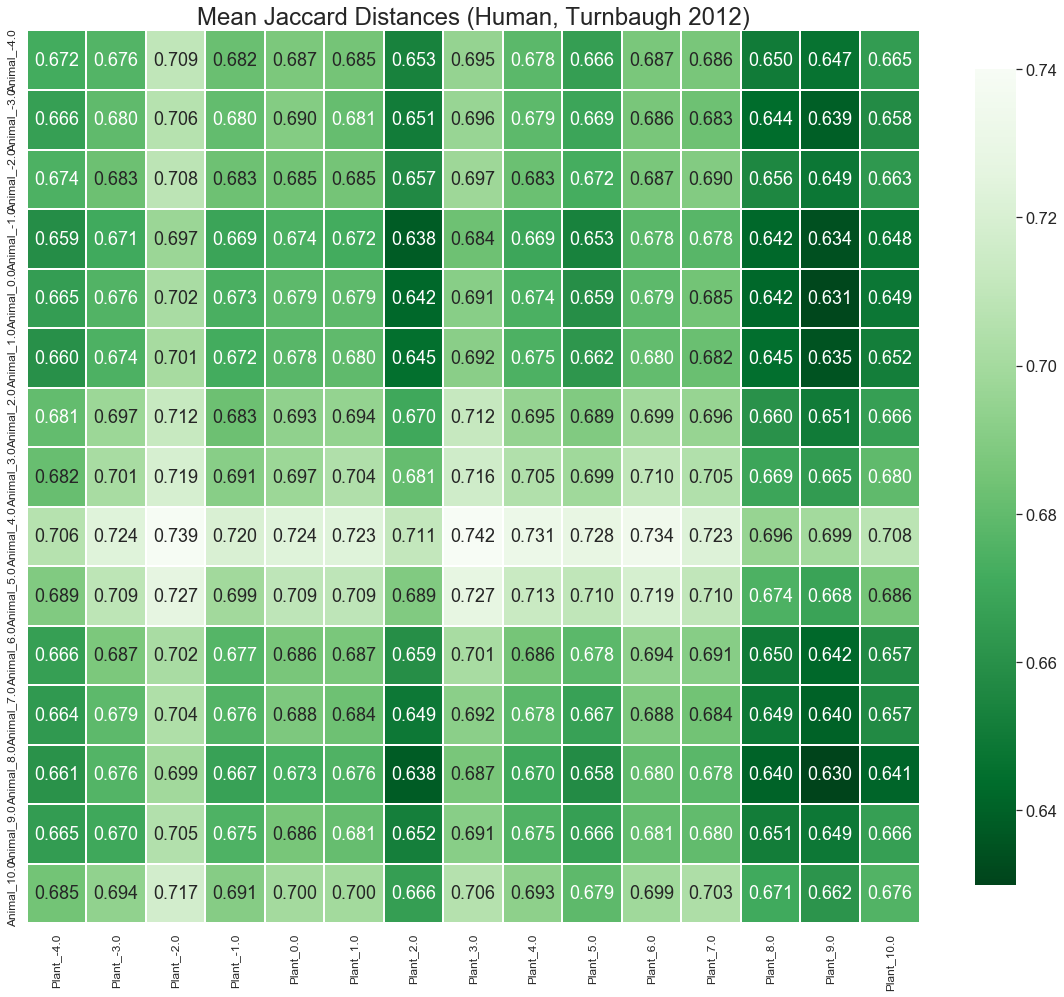

In [71]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(mean2_alt_jc_dm, cmap='Greens_r', linewidths=1, cbar_kws={"shrink": 0.75},
            annot=True, fmt = '.3f', vmin=0.63, vmax=0.74, square=True)
sns.set(font_scale=1.5)
plt.xlabel("")
plt.xticks(ha="center")
plt.ylabel("")
plt.yticks(va="center", rotation=90)
ax.set_title("Mean Jaccard Distances (Human, Turnbaugh 2012)", size=24)
ax.tick_params(labelsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/Human_jc_mean_heatmap.svg', dpi=300, bbox_inches="tight")
#intervention Day 0-4

## Weighted UniFrac

In [54]:
human_wUF_dm = pd.read_csv('../data/David_Turnbaugh_2012Data/distance_matrix_weighted_unifrac.tsv', sep='\t', index_col=0)
human_wUF_dm.head()

,DD10,DD102,DD104,DD106,DD107,DD108,DD110,DD111,DD112,DD113,...,ID85,ID86,ID87,ID89,ID9,ID91,ID92,ID97,ID98,ID99
DD10,0.000000,0.168613,0.188294,0.067099,0.217834,0.293735,0.166686,0.284721,0.280579,0.121013,...,0.181509,0.231894,0.203451,0.135424,0.230470,0.185712,0.242924,0.256473,0.155151,0.102734
DD102,0.168613,0.000000,0.090318,0.168820,0.298861,0.285355,0.267134,0.343308,0.339338,0.192089,...,0.179506,0.278970,0.304538,0.221538,0.241101,0.161423,0.319907,0.320841,0.254129,0.194197
DD104,0.188294,0.090318,0.000000,0.191966,0.308250,0.290783,0.290456,0.365633,0.354611,0.221970,...,0.176213,0.289123,0.322556,0.235148,0.255520,0.144755,0.330924,0.319391,0.254180,0.223943
DD106,0.067099,0.168820,0.191966,0.000000,0.210597,0.278021,0.187064,0.282703,0.275180,0.129732,...,0.177828,0.224667,0.214471,0.129184,0.228746,0.171251,0.236547,0.254553,0.180469,0.132866
DD107,0.217834,0.298861,0.308250,0.210597,0.000000,0.405533,0.219015,0.186326,0.184291,0.262292,...,0.290204,0.145455,0.149225,0.221184,0.313045,0.261702,0.086670,0.290411,0.249445,0.263492


In [55]:
named_wUF_dm = pd.merge(human_metadata, human_wUF_dm, left_index=True, right_index=True)
named_wUF_dm.head()

,Subject/Food,Diet,Day,DD10,DD102,DD104,DD106,DD107,DD108,DD110,...,ID85,ID86,ID87,ID89,ID9,ID91,ID92,ID97,ID98,ID99
ID92,1,Animal,-3.0,0.242924,0.319907,0.330924,0.236547,0.086670,0.415829,0.232476,...,0.321181,0.148720,0.145648,0.242193,0.322105,0.283910,0.000000,0.294054,0.269760,0.273096
ID265,1,Animal,-2.0,0.168017,0.261424,0.277889,0.173039,0.159206,0.331780,0.156727,...,0.249694,0.207649,0.182850,0.174132,0.242294,0.235492,0.129795,0.252031,0.176825,0.185535
ID58,1,Animal,-1.0,0.179135,0.269079,0.282525,0.190933,0.141645,0.358952,0.165156,...,0.267326,0.199730,0.191898,0.191476,0.258138,0.251528,0.101519,0.259905,0.193852,0.200603
ID46,1,Animal,0.0,0.155133,0.222042,0.233129,0.150415,0.140923,0.346657,0.203338,...,0.248019,0.184141,0.201054,0.186333,0.259088,0.201117,0.130491,0.238715,0.212369,0.208433
ID237,1,Animal,1.0,0.184441,0.250344,0.266573,0.176827,0.117849,0.360713,0.193721,...,0.259523,0.180650,0.186148,0.190534,0.267731,0.215028,0.098046,0.249625,0.220126,0.217504


In [56]:
sorter = ['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0']
sorterIndex = dict(zip(sorter,range(len(sorter))))
named_wUF_dm['Rank'] = named_wUF_dm['Day'].map(sorterIndex) #already set plant_timepoint = animal_timepoint
named_wUF_dm = named_wUF_dm.sort_values(by=['Rank'], axis=0, ascending=True)

In [57]:
named_wUF_dm['group_time'] = named_wUF_dm['Diet'].astype(str) + '_' + named_wUF_dm['Day'].astype(str)

In [58]:
gt_wUF_dm = named_wUF_dm[['group_time']].copy()
gt_wUF_dm.head()

,group_time
ID92,Animal_-3.0
ID265,Animal_-2.0
ID58,Animal_-1.0
ID46,Animal_0.0
ID237,Animal_1.0


In [59]:
named_wUF_dm = named_wUF_dm.set_index('group_time')
named_wUF_dm

,Subject/Food,Diet,Day,DD10,DD102,DD104,DD106,DD107,DD108,DD110,...,ID86,ID87,ID89,ID9,ID91,ID92,ID97,ID98,ID99,Rank
group_time,,,,,,,,,,,,,,,,,,,,,
Animal_-3.0,1,Animal,-3.0,0.242924,0.319907,0.330924,0.236547,0.086670,0.415829,0.232476,...,0.148720,0.145648,0.242193,0.322105,0.283910,0.000000,0.294054,0.269760,0.273096,NaN
Animal_-2.0,1,Animal,-2.0,0.168017,0.261424,0.277889,0.173039,0.159206,0.331780,0.156727,...,0.207649,0.182850,0.174132,0.242294,0.235492,0.129795,0.252031,0.176825,0.185535,NaN
Animal_-1.0,1,Animal,-1.0,0.179135,0.269079,0.282525,0.190933,0.141645,0.358952,0.165156,...,0.199730,0.191898,0.191476,0.258138,0.251528,0.101519,0.259905,0.193852,0.200603,NaN
Animal_0.0,1,Animal,0.0,0.155133,0.222042,0.233129,0.150415,0.140923,0.346657,0.203338,...,0.184141,0.201054,0.186333,0.259088,0.201117,0.130491,0.238715,0.212369,0.208433,NaN
Animal_1.0,1,Animal,1.0,0.184441,0.250344,0.266573,0.176827,0.117849,0.360713,0.193721,...,0.180650,0.186148,0.190534,0.267731,0.215028,0.098046,0.249625,0.220126,0.217504,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Animal_0.0,11,Animal,0.0,0.207101,0.274111,0.277501,0.201357,0.166584,0.392178,0.255080,...,0.168712,0.191838,0.213374,0.311461,0.168141,0.177614,0.265139,0.242399,0.250245,NaN
Animal_1.0,11,Animal,1.0,0.185712,0.161423,0.144755,0.171251,0.261702,0.312861,0.277174,...,0.273063,0.286311,0.207609,0.253812,0.000000,0.283910,0.302583,0.240452,0.214032,NaN
Animal_5.0,11,Animal,5.0,0.259489,0.342121,0.337666,0.268023,0.186694,0.408737,0.251830,...,0.202307,0.175512,0.268617,0.319079,0.257039,0.183552,0.284373,0.249187,0.279866,NaN


In [60]:
named_wUF_dm2 = named_wUF_dm.drop(columns=['Subject/Food', 'Diet', 'Day', 'Rank'])
named_wUF_dm2

,DD10,DD102,DD104,DD106,DD107,DD108,DD110,DD111,DD112,DD113,...,ID85,ID86,ID87,ID89,ID9,ID91,ID92,ID97,ID98,ID99
group_time,,,,,,,,,,,,,,,,,,,,,
Animal_-3.0,0.242924,0.319907,0.330924,0.236547,0.086670,0.415829,0.232476,0.173204,0.171008,0.266210,...,0.321181,0.148720,0.145648,0.242193,0.322105,0.283910,0.000000,0.294054,0.269760,0.273096
Animal_-2.0,0.168017,0.261424,0.277889,0.173039,0.159206,0.331780,0.156727,0.241387,0.246305,0.180085,...,0.249694,0.207649,0.182850,0.174132,0.242294,0.235492,0.129795,0.252031,0.176825,0.185535
Animal_-1.0,0.179135,0.269079,0.282525,0.190933,0.141645,0.358952,0.165156,0.238198,0.241027,0.195103,...,0.267326,0.199730,0.191898,0.191476,0.258138,0.251528,0.101519,0.259905,0.193852,0.200603
Animal_0.0,0.155133,0.222042,0.233129,0.150415,0.140923,0.346657,0.203338,0.244088,0.246745,0.202040,...,0.248019,0.184141,0.201054,0.186333,0.259088,0.201117,0.130491,0.238715,0.212369,0.208433
Animal_1.0,0.184441,0.250344,0.266573,0.176827,0.117849,0.360713,0.193721,0.227085,0.233845,0.216339,...,0.259523,0.180650,0.186148,0.190534,0.267731,0.215028,0.098046,0.249625,0.220126,0.217504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Animal_0.0,0.207101,0.274111,0.277501,0.201357,0.166584,0.392178,0.255080,0.218473,0.221731,0.254206,...,0.276351,0.168712,0.191838,0.213374,0.311461,0.168141,0.177614,0.265139,0.242399,0.250245
Animal_1.0,0.185712,0.161423,0.144755,0.171251,0.261702,0.312861,0.277174,0.323518,0.324588,0.216149,...,0.179395,0.273063,0.286311,0.207609,0.253812,0.000000,0.283910,0.302583,0.240452,0.214032
Animal_5.0,0.259489,0.342121,0.337666,0.268023,0.186694,0.408737,0.251830,0.198779,0.203618,0.281311,...,0.351746,0.202307,0.175512,0.268617,0.319079,0.257039,0.183552,0.284373,0.249187,0.279866


In [61]:
rn_wUF_dm = pd.merge(named_wUF_dm2.T, gt_wUF_dm, left_index=True, right_index=True)
rn_wUF_dm2 = rn_wUF_dm.set_index('group_time')
rn_wUF_dm2

,Animal_-3.0,Animal_-2.0,Animal_-1.0,Animal_0.0,Animal_1.0,Animal_2.0,Animal_4.0,Animal_5.0,Animal_6.0,Animal_7.0,...,Plant_3.0,Plant_4.0,Plant_5.0,Plant_6.0,Animal_-3.0,Animal_0.0,Animal_1.0,Animal_5.0,Animal_6.0,Animal_7.0
group_time,,,,,,,,,,,,,,,,,,,,,
Plant_-3.0,0.242924,0.168017,0.179135,0.155133,0.184441,0.186822,0.290487,0.187150,0.300114,0.266454,...,0.207239,0.210202,0.196587,0.214109,0.184194,0.207101,0.185712,0.259489,0.243164,0.172837
Plant_5.0,0.319907,0.261424,0.269079,0.222042,0.250344,0.214644,0.370671,0.206384,0.379231,0.340460,...,0.218472,0.212160,0.206998,0.202987,0.169150,0.274111,0.161423,0.342121,0.308188,0.232908
Plant_5.0,0.330924,0.277889,0.282525,0.233129,0.266573,0.227465,0.385730,0.210084,0.393468,0.356357,...,0.228639,0.212004,0.213251,0.185515,0.153179,0.277501,0.144755,0.337666,0.300258,0.232857
Plant_4.0,0.236547,0.173039,0.190933,0.150415,0.176827,0.211274,0.313479,0.208273,0.310064,0.269891,...,0.203964,0.196659,0.190499,0.196395,0.172692,0.201357,0.171251,0.268023,0.245344,0.161449
Plant_5.0,0.086670,0.159206,0.141645,0.140923,0.117849,0.251005,0.217348,0.249351,0.176635,0.125898,...,0.305991,0.315251,0.318726,0.330562,0.277209,0.166584,0.261702,0.186694,0.164369,0.178439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Animal_1.0,0.283910,0.235492,0.251528,0.201117,0.215028,0.223667,0.327224,0.183490,0.352161,0.309970,...,0.241220,0.216599,0.229278,0.205162,0.083905,0.168141,0.000000,0.257039,0.228150,0.130343
Animal_-3.0,0.000000,0.129795,0.101519,0.130491,0.098046,0.240965,0.207548,0.257504,0.170386,0.129076,...,0.331155,0.341265,0.345024,0.359772,0.292052,0.177614,0.283910,0.183552,0.171088,0.200463
Animal_7.0,0.294054,0.252031,0.259905,0.238715,0.249625,0.289377,0.369568,0.322103,0.332563,0.343355,...,0.342102,0.353199,0.357963,0.379322,0.289844,0.265139,0.302583,0.284373,0.283949,0.253815


In [62]:
al_wUF_dm = rn_wUF_dm2.filter(regex='Plant', axis=0)
alt_wUF_dm = al_wUF_dm.filter(regex='Animal', axis=1)
alt_wUF_dm.shape

(87, 87)

In [63]:
alt_wUF_dm.head()

,Animal_-3.0,Animal_-2.0,Animal_-1.0,Animal_0.0,Animal_1.0,Animal_2.0,Animal_4.0,Animal_5.0,Animal_6.0,Animal_7.0,...,Animal_2.0,Animal_3.0,Animal_4.0,Animal_6.0,Animal_-3.0,Animal_0.0,Animal_1.0,Animal_5.0,Animal_6.0,Animal_7.0
group_time,,,,,,,,,,,,,,,,,,,,,
Plant_-3.0,0.242924,0.168017,0.179135,0.155133,0.184441,0.186822,0.290487,0.187150,0.300114,0.266454,...,0.185091,0.152428,0.223671,0.243576,0.184194,0.207101,0.185712,0.259489,0.243164,0.172837
Plant_5.0,0.319907,0.261424,0.269079,0.222042,0.250344,0.214644,0.370671,0.206384,0.379231,0.340460,...,0.267589,0.244389,0.294895,0.338480,0.169150,0.274111,0.161423,0.342121,0.308188,0.232908
Plant_5.0,0.330924,0.277889,0.282525,0.233129,0.266573,0.227465,0.385730,0.210084,0.393468,0.356357,...,0.285972,0.270631,0.323566,0.346240,0.153179,0.277501,0.144755,0.337666,0.300258,0.232857
Plant_4.0,0.236547,0.173039,0.190933,0.150415,0.176827,0.211274,0.313479,0.208273,0.310064,0.269891,...,0.219893,0.180396,0.248998,0.245775,0.172692,0.201357,0.171251,0.268023,0.245344,0.161449
Plant_5.0,0.086670,0.159206,0.141645,0.140923,0.117849,0.251005,0.217348,0.249351,0.176635,0.125898,...,0.289727,0.262857,0.239181,0.187368,0.277209,0.166584,0.261702,0.186694,0.164369,0.178439


In [64]:
alt_wUF_dm.columns.unique()

Index(['Animal_-3.0', 'Animal_-2.0', 'Animal_-1.0', 'Animal_0.0', 'Animal_1.0',
       'Animal_2.0', 'Animal_4.0', 'Animal_5.0', 'Animal_6.0', 'Animal_7.0',
       'Animal_3.0'],
      dtype='object')

In [65]:
alt_wUF_dm2 = alt_wUF_dm.drop(index=['Plant_-5.0'], axis=0)

KeyError: "['Plant_-5.0'] not found in axis"

In [ ]:
mean_alt_wUF_dm = alt_wUF_dm2.groupby(level=0).mean()
mean_alt_wUF_dm = mean_alt_wUF_dm.reindex(index = ['Plant_-4.0', 'Plant_-3.0', 'Plant_-2.0', 'Plant_-1.0', 'Plant_0.0',
       'Plant_1.0', 'Plant_2.0', 'Plant_3.0', 'Plant_4.0', 'Plant_5.0',
       'Plant_6.0', 'Plant_7.0', 'Plant_8.0', 'Plant_9.0', 'Plant_10.0'])
mean2_alt_wUF_dm = mean_alt_wUF_dm.T.groupby(level=0).mean().sort_index(axis=0)
mean2_alt_wUF_dm = mean2_alt_wUF_dm.reindex(index = ['Animal_-4.0', 'Animal_-3.0', 'Animal_-2.0', 'Animal_-1.0',
       'Animal_0.0', 'Animal_1.0', 'Animal_2.0', 'Animal_3.0', 'Animal_4.0', 'Animal_5.0',
       'Animal_6.0', 'Animal_7.0', 'Animal_8.0', 'Animal_9.0', 'Animal_10.0'])
mean2_alt_wUF_dm

In [66]:
#mean_alt_wUF_dm = alt_wUF_dm.groupby(level=0).mean()
#mean_alt_wUF_dm = mean_alt_wUF_dm.reindex(index = ['Plant_-3.0', 'Plant_-2.0', 'Plant_-1.0', 'Plant_0.0',
#       'Plant_1.0', 'Plant_2.0', 'Plant_3.0', 'Plant_4.0', 'Plant_5.0',
#       'Plant_6.0', 'Plant_7.0'])
#mean2_alt_wUF_dm = mean_alt_wUF_dm.T.groupby(level=0).mean().sort_index(axis=0)
#mean2_alt_wUF_dm = mean2_alt_wUF_dm.reindex(index = ['Animal_-3.0', 'Animal_-2.0', 'Animal_-1.0',
#       'Animal_0.0', 'Animal_1.0', 'Animal_2.0', 'Animal_3.0', 'Animal_4.0', 'Animal_5.0',
#       'Animal_6.0', 'Animal_7.0'])
#mean2_alt_wUF_dm

group_time,Plant_-3.0,Plant_-2.0,Plant_-1.0,Plant_0.0,Plant_1.0,Plant_2.0,Plant_3.0,Plant_4.0,Plant_5.0,Plant_6.0,Plant_7.0
Animal_-3.0,0.247334,0.245974,0.283598,0.262431,0.258683,0.238322,0.261815,0.252358,0.254143,0.254985,0.247958
Animal_-2.0,0.281701,0.255340,0.309997,0.273548,0.265316,0.248305,0.280855,0.276235,0.268513,0.252631,0.280541
Animal_-1.0,0.264178,0.253033,0.297361,0.274323,0.267722,0.247722,0.273941,0.267774,0.267718,0.260880,0.268618
Animal_0.0,0.223383,0.223899,0.261938,0.242226,0.236677,0.214134,0.238900,0.235872,0.238915,0.237101,0.231155
Animal_1.0,0.234667,0.237527,0.271366,0.253991,0.254248,0.231421,0.252344,0.248200,0.255918,0.255529,0.242701
Animal_2.0,0.257914,0.238279,0.287631,0.257578,0.262205,0.239776,0.269477,0.265735,0.270559,0.259711,0.263865
Animal_3.0,0.251205,0.277258,0.291011,0.279016,0.305029,0.278766,0.282898,0.279172,0.294067,0.299711,0.272401
Animal_4.0,0.268021,0.278727,0.299646,0.284108,0.305154,0.284434,0.293016,0.291291,0.303528,0.300169,0.281752
Animal_5.0,0.251487,0.285516,0.288782,0.286552,0.308902,0.287323,0.287767,0.284705,0.302268,0.312173,0.269098
Animal_6.0,0.227658,0.277401,0.269594,0.274151,0.301069,0.273639,0.267633,0.264248,0.286037,0.302192,0.244472


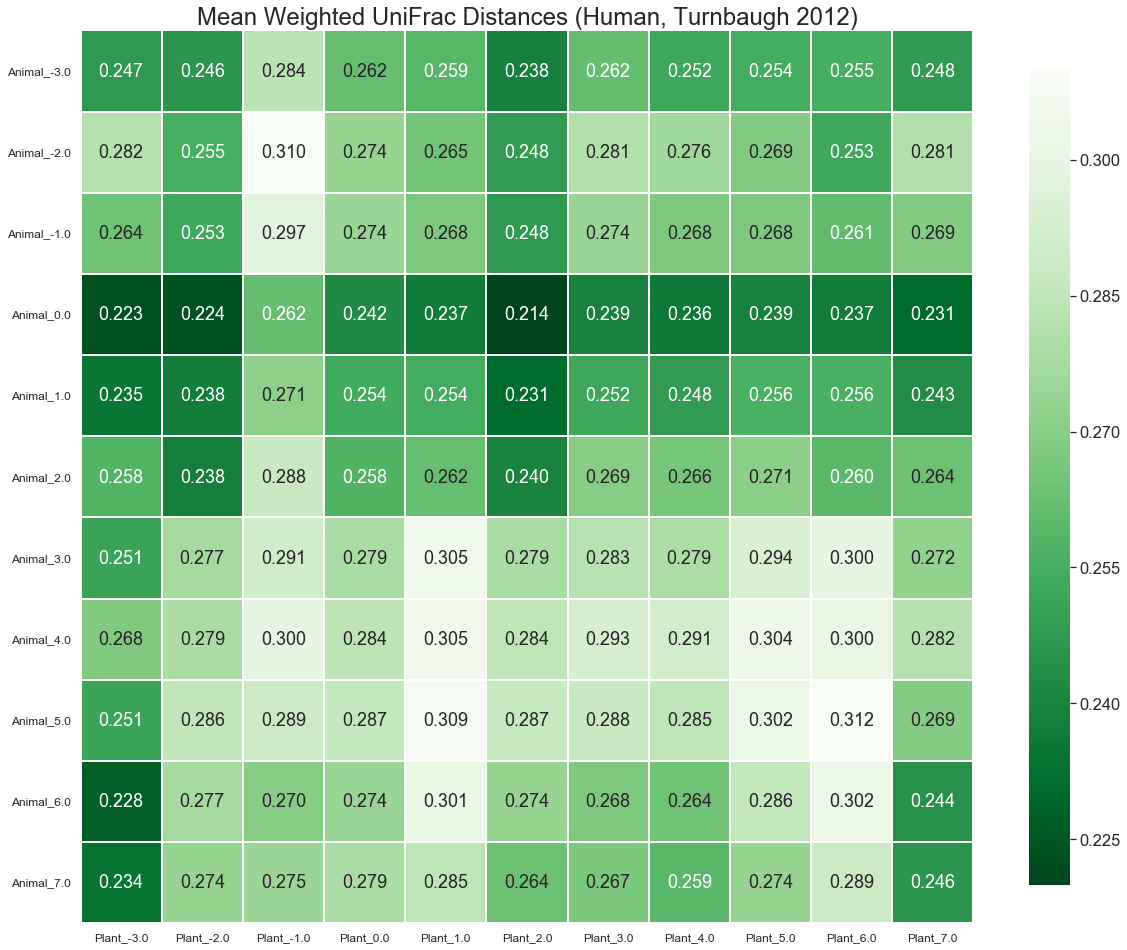

In [71]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(mean2_alt_wUF_dm, cmap='Greens_r', linewidths=1, cbar_kws={"shrink": 0.75},
            annot=True, fmt = '.3f', vmin=0.22, vmax=0.31, square=True)
sns.set(font_scale=1.5)
plt.xlabel("")
plt.xticks(ha="center")
plt.ylabel("")
plt.yticks(va="center", rotation=0)
ax.set_title("Mean Weighted UniFrac Distances (Human, Turnbaugh 2012)", size=24)
ax.tick_params(labelsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/Human_wUF_mean_heatmap.svg', dpi=300, bbox_inches="tight")
#intervention Day 0-4

In [68]:
mean2_alt_wUF_dm.min()

group_time
Plant_-3.0    0.223383
Plant_-2.0    0.223899
Plant_-1.0    0.261938
Plant_0.0     0.242226
Plant_1.0     0.236677
Plant_2.0     0.214134
Plant_3.0     0.238900
Plant_4.0     0.235872
Plant_5.0     0.238915
Plant_6.0     0.237101
Plant_7.0     0.231155
dtype: float64

In [69]:
mean2_alt_wUF_dm.max()

group_time
Plant_-3.0    0.281701
Plant_-2.0    0.285516
Plant_-1.0    0.309997
Plant_0.0     0.286552
Plant_1.0     0.308902
Plant_2.0     0.287323
Plant_3.0     0.293016
Plant_4.0     0.291291
Plant_5.0     0.303528
Plant_6.0     0.312173
Plant_7.0     0.281752
dtype: float64

## Unweighted UniFrac

In [37]:
human_uwUF_dm = pd.read_csv('../data/David_Turnbaugh_2012Data/distance_matrix_unweighted_unifrac.tsv', sep='\t', index_col=0)
human_uwUF_dm.head()

,DD1,DD10,DD100,DD101,DD102,DD103,DD104,DD106,DD107,DD108,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
DD1,0.000000,0.623623,0.723820,0.604695,0.586423,0.645695,0.632213,0.551983,0.553588,0.749660,...,0.593298,0.584398,0.712562,0.632195,0.597469,0.592994,0.639445,0.678922,0.670382,0.578118
DD10,0.623623,0.000000,0.587347,0.528801,0.442654,0.443121,0.455333,0.290426,0.539945,0.597651,...,0.418520,0.504473,0.592173,0.424931,0.552024,0.546005,0.536564,0.595576,0.547486,0.254604
DD100,0.723820,0.587347,0.000000,0.639925,0.649899,0.642085,0.664082,0.565704,0.637121,0.217299,...,0.586144,0.609713,0.278460,0.666430,0.696527,0.636488,0.620120,0.477287,0.686386,0.610815
DD101,0.604695,0.528801,0.639925,0.000000,0.245181,0.613620,0.336299,0.521119,0.600544,0.647381,...,0.504588,0.635419,0.618922,0.471790,0.574488,0.588661,0.681603,0.530730,0.654124,0.574477
DD102,0.586423,0.442654,0.649899,0.245181,0.000000,0.586859,0.322353,0.456822,0.590521,0.655984,...,0.488709,0.605709,0.622778,0.489006,0.511163,0.599484,0.630319,0.572301,0.617612,0.531175


In [38]:
named_uwUF_dm = pd.merge(human_metadata, human_uwUF_dm, left_index=True, right_index=True)
named_uwUF_dm.head()

,Subject/Food,Diet,Day,DD1,DD10,DD100,DD101,DD102,DD103,DD104,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
ID63,1,Animal,-4.0,0.620564,0.526398,0.629765,0.563864,0.557063,0.532379,0.595525,...,0.449810,0.597728,0.613436,0.574914,0.563506,0.188177,0.592437,0.603945,0.541507,0.507192
ID92,1,Animal,-3.0,0.592994,0.546005,0.636488,0.588661,0.599484,0.565283,0.612038,...,0.470942,0.574451,0.636953,0.521736,0.575619,0.000000,0.595157,0.621781,0.588997,0.540052
ID265,1,Animal,-2.0,0.591898,0.492531,0.615967,0.545822,0.560133,0.505439,0.573850,...,0.464223,0.560127,0.590875,0.533259,0.569976,0.248587,0.561586,0.573658,0.516899,0.475781
ID58,1,Animal,-1.0,0.656227,0.526108,0.643603,0.587236,0.607699,0.526574,0.612095,...,0.492098,0.605494,0.618207,0.557773,0.623247,0.216882,0.604288,0.610935,0.542899,0.505319
ID46,1,Animal,0.0,0.632949,0.546634,0.648261,0.534369,0.550917,0.555397,0.577962,...,0.463774,0.610828,0.618987,0.545986,0.575216,0.202342,0.597646,0.614638,0.590342,0.545799


In [39]:
sorter = ['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0']
sorterIndex = dict(zip(sorter,range(len(sorter))))
named_uwUF_dm['Rank'] = named_uwUF_dm['Day'].map(sorterIndex) #already set plant_timepoint = animal_timepoint
named_uwUF_dm = named_uwUF_dm.sort_values(by=['Rank'], axis=0, ascending=True)

In [40]:
named_uwUF_dm['group_time'] = named_uwUF_dm['Diet'].astype(str) + '_' + named_uwUF_dm['Day'].astype(str)

In [41]:
gt_uwUF_dm = named_uwUF_dm[['group_time']].copy()
gt_uwUF_dm.head()

,group_time
ID63,Animal_-4.0
ID92,Animal_-3.0
ID265,Animal_-2.0
ID58,Animal_-1.0
ID46,Animal_0.0


In [42]:
named_uwUF_dm = named_uwUF_dm.set_index('group_time')
named_uwUF_dm

,Subject/Food,Diet,Day,DD1,DD10,DD100,DD101,DD102,DD103,DD104,...,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99,Rank
group_time,,,,,,,,,,,,,,,,,,,,,
Animal_-4.0,1,Animal,-4.0,0.620564,0.526398,0.629765,0.563864,0.557063,0.532379,0.595525,...,0.597728,0.613436,0.574914,0.563506,0.188177,0.592437,0.603945,0.541507,0.507192,NaN
Animal_-3.0,1,Animal,-3.0,0.592994,0.546005,0.636488,0.588661,0.599484,0.565283,0.612038,...,0.574451,0.636953,0.521736,0.575619,0.000000,0.595157,0.621781,0.588997,0.540052,NaN
Animal_-2.0,1,Animal,-2.0,0.591898,0.492531,0.615967,0.545822,0.560133,0.505439,0.573850,...,0.560127,0.590875,0.533259,0.569976,0.248587,0.561586,0.573658,0.516899,0.475781,NaN
Animal_-1.0,1,Animal,-1.0,0.656227,0.526108,0.643603,0.587236,0.607699,0.526574,0.612095,...,0.605494,0.618207,0.557773,0.623247,0.216882,0.604288,0.610935,0.542899,0.505319,NaN
Animal_0.0,1,Animal,0.0,0.632949,0.546634,0.648261,0.534369,0.550917,0.555397,0.577962,...,0.610828,0.618987,0.545986,0.575216,0.202342,0.597646,0.614638,0.590342,0.545799,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Animal_6.0,11,Animal,6.0,0.565877,0.593678,0.725081,0.616097,0.569848,0.598188,0.573643,...,0.668897,0.680126,0.608783,0.423305,0.639524,0.667309,0.643191,0.583851,0.588711,NaN
Animal_7.0,11,Animal,7.0,0.547544,0.548343,0.705714,0.566269,0.497765,0.637044,0.548909,...,0.607547,0.676105,0.547588,0.282490,0.588108,0.646691,0.641334,0.639489,0.607954,NaN
Animal_8.0,11,Animal,8.0,0.585468,0.498675,0.607405,0.487274,0.417099,0.599732,0.465853,...,0.596823,0.572226,0.516083,0.288727,0.560099,0.620173,0.497130,0.599006,0.558714,NaN


In [43]:
named_uwUF_dm2 = named_uwUF_dm.drop(columns=['Subject/Food', 'Diet', 'Day', 'Rank'])
named_uwUF_dm2

,DD1,DD10,DD100,DD101,DD102,DD103,DD104,DD106,DD107,DD108,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
group_time,,,,,,,,,,,,,,,,,,,,,
Animal_-4.0,0.620564,0.526398,0.629765,0.563864,0.557063,0.532379,0.595525,0.526520,0.287388,0.628994,...,0.449810,0.597728,0.613436,0.574914,0.563506,0.188177,0.592437,0.603945,0.541507,0.507192
Animal_-3.0,0.592994,0.546005,0.636488,0.588661,0.599484,0.565283,0.612038,0.506982,0.213710,0.654887,...,0.470942,0.574451,0.636953,0.521736,0.575619,0.000000,0.595157,0.621781,0.588997,0.540052
Animal_-2.0,0.591898,0.492531,0.615967,0.545822,0.560133,0.505439,0.573850,0.492533,0.328229,0.601119,...,0.464223,0.560127,0.590875,0.533259,0.569976,0.248587,0.561586,0.573658,0.516899,0.475781
Animal_-1.0,0.656227,0.526108,0.643603,0.587236,0.607699,0.526574,0.612095,0.544194,0.337965,0.633598,...,0.492098,0.605494,0.618207,0.557773,0.623247,0.216882,0.604288,0.610935,0.542899,0.505319
Animal_0.0,0.632949,0.546634,0.648261,0.534369,0.550917,0.555397,0.577962,0.530750,0.281075,0.629199,...,0.463774,0.610828,0.618987,0.545986,0.575216,0.202342,0.597646,0.614638,0.590342,0.545799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Animal_6.0,0.565877,0.593678,0.725081,0.616097,0.569848,0.598188,0.573643,0.599123,0.643348,0.723530,...,0.623052,0.668897,0.680126,0.608783,0.423305,0.639524,0.667309,0.643191,0.583851,0.588711
Animal_7.0,0.547544,0.548343,0.705714,0.566269,0.497765,0.637044,0.548909,0.587737,0.581796,0.723784,...,0.557639,0.607547,0.676105,0.547588,0.282490,0.588108,0.646691,0.641334,0.639489,0.607954
Animal_8.0,0.585468,0.498675,0.607405,0.487274,0.417099,0.599732,0.465853,0.508441,0.564286,0.627579,...,0.542294,0.596823,0.572226,0.516083,0.288727,0.560099,0.620173,0.497130,0.599006,0.558714


In [44]:
rn_uwUF_dm = pd.merge(named_uwUF_dm2.T, gt_uwUF_dm, left_index=True, right_index=True)
rn_uwUF_dm2 = rn_uwUF_dm.set_index('group_time')
rn_uwUF_dm2

,Animal_-4.0,Animal_-3.0,Animal_-2.0,Animal_-1.0,Animal_0.0,Animal_1.0,Animal_2.0,Animal_4.0,Animal_5.0,Animal_6.0,...,Animal_-4.0,Animal_-3.0,Animal_0.0,Animal_1.0,Animal_5.0,Animal_6.0,Animal_7.0,Animal_8.0,Animal_9.0,Animal_10.0
group_time,,,,,,,,,,,,,,,,,,,,,
Plant_-3.0,0.526398,0.546005,0.492531,0.526108,0.546634,0.567288,0.564050,0.633498,0.613661,0.533666,...,0.526798,0.529192,0.580074,0.552024,0.601771,0.593678,0.548343,0.498675,0.550544,0.558412
Plant_5.0,0.557063,0.599484,0.560133,0.607699,0.550917,0.548292,0.613660,0.606279,0.592218,0.560115,...,0.504588,0.472415,0.516479,0.511163,0.562264,0.569848,0.497765,0.417099,0.496618,0.552624
Plant_5.0,0.595525,0.612038,0.573850,0.612095,0.577962,0.596525,0.617161,0.651116,0.581770,0.594441,...,0.515210,0.518058,0.583042,0.541592,0.583239,0.573643,0.548909,0.465853,0.520738,0.557716
Plant_4.0,0.526520,0.506982,0.492533,0.544194,0.530750,0.512660,0.549967,0.687163,0.629434,0.545146,...,0.484813,0.523766,0.595305,0.559239,0.584206,0.599123,0.587737,0.508441,0.561264,0.560656
Plant_5.0,0.287388,0.213710,0.328229,0.337965,0.281075,0.277735,0.470769,0.505039,0.529680,0.390912,...,0.512057,0.555351,0.571671,0.581101,0.625751,0.643348,0.581796,0.564286,0.536448,0.543146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Animal_-3.0,0.188177,0.000000,0.248587,0.216882,0.202342,0.176717,0.434420,0.545356,0.555422,0.428466,...,0.524769,0.551053,0.566222,0.575619,0.615565,0.639524,0.588108,0.560099,0.571830,0.593715
Animal_-4.0,0.592437,0.595157,0.561586,0.604288,0.597646,0.599528,0.599759,0.654850,0.602637,0.599906,...,0.612766,0.634802,0.633297,0.619576,0.625096,0.667309,0.646691,0.620173,0.635862,0.700228
Animal_7.0,0.603945,0.621781,0.573658,0.610935,0.614638,0.614199,0.626678,0.695241,0.694043,0.578753,...,0.557632,0.536107,0.624099,0.629291,0.581295,0.643191,0.641334,0.497130,0.556597,0.628858


In [45]:
al_uwUF_dm = rn_uwUF_dm2.filter(regex='Plant', axis=0)
alt_uwUF_dm = al_uwUF_dm.filter(regex='Animal', axis=1)
alt_uwUF_dm.shape

(115, 121)

In [46]:
alt_uwUF_dm.head()

,Animal_-4.0,Animal_-3.0,Animal_-2.0,Animal_-1.0,Animal_0.0,Animal_1.0,Animal_2.0,Animal_4.0,Animal_5.0,Animal_6.0,...,Animal_-4.0,Animal_-3.0,Animal_0.0,Animal_1.0,Animal_5.0,Animal_6.0,Animal_7.0,Animal_8.0,Animal_9.0,Animal_10.0
group_time,,,,,,,,,,,,,,,,,,,,,
Plant_-3.0,0.526398,0.546005,0.492531,0.526108,0.546634,0.567288,0.564050,0.633498,0.613661,0.533666,...,0.526798,0.529192,0.580074,0.552024,0.601771,0.593678,0.548343,0.498675,0.550544,0.558412
Plant_5.0,0.557063,0.599484,0.560133,0.607699,0.550917,0.548292,0.613660,0.606279,0.592218,0.560115,...,0.504588,0.472415,0.516479,0.511163,0.562264,0.569848,0.497765,0.417099,0.496618,0.552624
Plant_5.0,0.595525,0.612038,0.573850,0.612095,0.577962,0.596525,0.617161,0.651116,0.581770,0.594441,...,0.515210,0.518058,0.583042,0.541592,0.583239,0.573643,0.548909,0.465853,0.520738,0.557716
Plant_4.0,0.526520,0.506982,0.492533,0.544194,0.530750,0.512660,0.549967,0.687163,0.629434,0.545146,...,0.484813,0.523766,0.595305,0.559239,0.584206,0.599123,0.587737,0.508441,0.561264,0.560656
Plant_5.0,0.287388,0.213710,0.328229,0.337965,0.281075,0.277735,0.470769,0.505039,0.529680,0.390912,...,0.512057,0.555351,0.571671,0.581101,0.625751,0.643348,0.581796,0.564286,0.536448,0.543146


In [47]:
alt_uwUF_dm.columns.unique()

Index(['Animal_-4.0', 'Animal_-3.0', 'Animal_-2.0', 'Animal_-1.0',
       'Animal_0.0', 'Animal_1.0', 'Animal_2.0', 'Animal_4.0', 'Animal_5.0',
       'Animal_6.0', 'Animal_7.0', 'Animal_8.0', 'Animal_9.0', 'Animal_10.0',
       'Animal_3.0'],
      dtype='object')

In [48]:
alt_uwUF_dm2 = alt_uwUF_dm.drop(index=['Plant_-5.0'], axis=0)

In [49]:
mean_alt_uwUF_dm = alt_uwUF_dm2.groupby(level=0).mean()
mean_alt_uwUF_dm = mean_alt_uwUF_dm.reindex(index = ['Plant_-4.0', 'Plant_-3.0', 'Plant_-2.0', 'Plant_-1.0', 'Plant_0.0',
       'Plant_1.0', 'Plant_2.0', 'Plant_3.0', 'Plant_4.0', 'Plant_5.0',
       'Plant_6.0', 'Plant_7.0', 'Plant_8.0', 'Plant_9.0', 'Plant_10.0'])
mean2_alt_uwUF_dm = mean_alt_uwUF_dm.T.groupby(level=0).mean().sort_index(axis=0)
mean2_alt_uwUF_dm = mean2_alt_uwUF_dm.reindex(index = ['Animal_-4.0', 'Animal_-3.0', 'Animal_-2.0', 'Animal_-1.0',
       'Animal_0.0', 'Animal_1.0', 'Animal_2.0', 'Animal_3.0', 'Animal_4.0', 'Animal_5.0',
       'Animal_6.0', 'Animal_7.0', 'Animal_8.0', 'Animal_9.0', 'Animal_10.0'])
mean2_alt_uwUF_dm

group_time,Plant_-4.0,Plant_-3.0,Plant_-2.0,Plant_-1.0,Plant_0.0,Plant_1.0,Plant_2.0,Plant_3.0,Plant_4.0,Plant_5.0,Plant_6.0,Plant_7.0,Plant_8.0,Plant_9.0,Plant_10.0
Animal_-4.0,0.525593,0.533882,0.551775,0.550018,0.561913,0.540139,0.547290,0.558732,0.547699,0.552379,0.557106,0.546376,0.546254,0.538120,0.562520
Animal_-3.0,0.519234,0.535134,0.548608,0.540979,0.559253,0.524617,0.550013,0.561528,0.546277,0.547882,0.551242,0.518387,0.543456,0.541124,0.560249
Animal_-2.0,0.539865,0.555031,0.556866,0.559045,0.554793,0.548085,0.558598,0.574971,0.569645,0.564632,0.553929,0.555360,0.565904,0.542130,0.569939
Animal_-1.0,0.513877,0.526254,0.542338,0.538422,0.560053,0.524733,0.538717,0.557252,0.546451,0.543962,0.555811,0.531617,0.547228,0.530795,0.557094
Animal_0.0,0.513063,0.521359,0.545366,0.543184,0.555439,0.527775,0.540365,0.553029,0.543445,0.545693,0.541906,0.542332,0.545200,0.527243,0.559041
Animal_1.0,0.526561,0.537968,0.555652,0.549969,0.564519,0.537471,0.553792,0.564602,0.551766,0.559527,0.557156,0.552325,0.545121,0.539583,0.561499
Animal_2.0,0.559533,0.567743,0.570906,0.563678,0.574812,0.568053,0.583574,0.602587,0.585863,0.594687,0.583787,0.570903,0.566957,0.564825,0.579134
Animal_3.0,0.563457,0.569093,0.584578,0.564364,0.587800,0.583394,0.589300,0.605024,0.588332,0.600091,0.596088,0.585977,0.558487,0.562818,0.581784
Animal_4.0,0.597700,0.600071,0.600909,0.588512,0.596871,0.604257,0.621137,0.631050,0.619609,0.627167,0.610191,0.601859,0.594544,0.602310,0.605769
Animal_5.0,0.567360,0.577867,0.587957,0.568134,0.596654,0.582732,0.600478,0.614938,0.597053,0.607630,0.599891,0.586820,0.574249,0.577307,0.593354


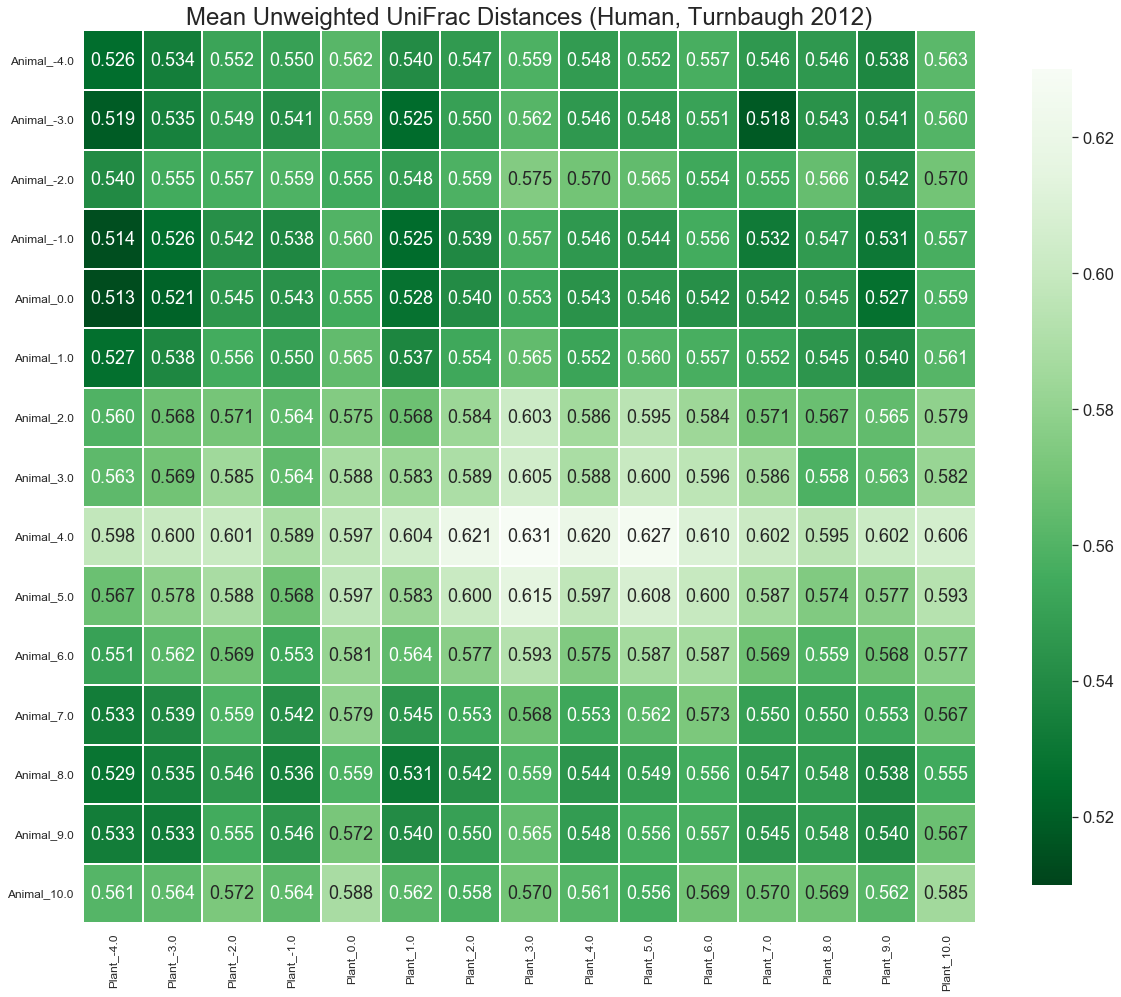

In [50]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(mean2_alt_uwUF_dm, cmap='Greens_r', linewidths=1, cbar_kws={"shrink": 0.75},
            annot=True, fmt = '.3f', vmin=0.51, vmax=0.63, square=True)
sns.set(font_scale=1.5)
plt.xlabel("")
plt.xticks(ha="center")
plt.ylabel("")
plt.yticks(va="center", rotation=0)
ax.set_title("Mean Unweighted UniFrac Distances (Human, Turnbaugh 2012)", size=24)
ax.tick_params(labelsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/Human_uwUF_mean_heatmap.svg', dpi=300, bbox_inches="tight")
#intervention Day 0-4

In [51]:
mean2_alt_uwUF_dm.min()

group_time
Plant_-4.0    0.513063
Plant_-3.0    0.521359
Plant_-2.0    0.542338
Plant_-1.0    0.535736
Plant_0.0     0.554793
Plant_1.0     0.524617
Plant_2.0     0.538717
Plant_3.0     0.553029
Plant_4.0     0.543445
Plant_5.0     0.543962
Plant_6.0     0.541906
Plant_7.0     0.518387
Plant_8.0     0.543456
Plant_9.0     0.527243
Plant_10.0    0.554616
dtype: float64

In [52]:
mean2_alt_uwUF_dm.max()

group_time
Plant_-4.0    0.597700
Plant_-3.0    0.600071
Plant_-2.0    0.600909
Plant_-1.0    0.588512
Plant_0.0     0.596871
Plant_1.0     0.604257
Plant_2.0     0.621137
Plant_3.0     0.631050
Plant_4.0     0.619609
Plant_5.0     0.627167
Plant_6.0     0.610191
Plant_7.0     0.601859
Plant_8.0     0.594544
Plant_9.0     0.602310
Plant_10.0    0.605769
dtype: float64